In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('recuperacao.csv', sep=";")
df

,Nome,Data de Nascimento,Valor da Dívida,Dias até Pagamento,Motivo da Dívida
0,Nicolas Nascimento,15/08/1987,32151.63,1,Outros
1,Maitê Freitas,07/08/1969,14113.95,8,Financiamento de automóveis
2,Esther da Costa,29/01/1998,36955.33,22,Outros
3,Davi Lucca Santos,30/05/1960,44662.89,3,Cheque especial
4,Isaac Novaes,27/12/1984,21385.13,1,Cartão de crédito
...,...,...,...,...,...
95,Sr. Diogo Cavalcanti,21/01/1982,13627.55,26,Financiamento de imóveis
96,Beatriz Porto,12/03/1982,14619.84,23,Outros
97,Sra. Eloah Souza,16/04/2005,49773.42,18,Outros
98,Luiza Gonçalves,26/10/1984,36061.21,5,Financiamento de automóveis


In [27]:
df_cheque_especial = df.loc[df['Motivo da Dívida'] == 'Cheque especial']

In [97]:
media = df_cheque_especial['Dias até Pagamento'].median()
amostra = df['Dias até Pagamento'] - df_cheque_especial['Dias até Pagamento'].median()
md_desvio = amostra.pow(2).median() / len(df_cheque_especial)
variancia = md_desvio
desvio_padrao = np.sqrt(variancia)

In [111]:
sete_dias = (media - 7) / desvio_padrao
sete_dias #3.62 representa 99%

3.6265342922358594

In [109]:
#Pagamento até 12 dias
doze_dias = (media - 12) / desvio_padrao
doze_dias #0.83 representa 79%

0.836892528977506

In [107]:
#Pagamento até 13 dias
treze_media = (media - 13) / desvio_padrao
treze_media #0.27 representa 60%

0.2789641763258353

In [113]:
#Pagamento até 20 dias
vinte_dias = (media - 20) / desvio_padrao
vinte_dias #-3.62 representa 0,01%

-3.6265342922358594

Text(0, 0.5, 'Percentual')

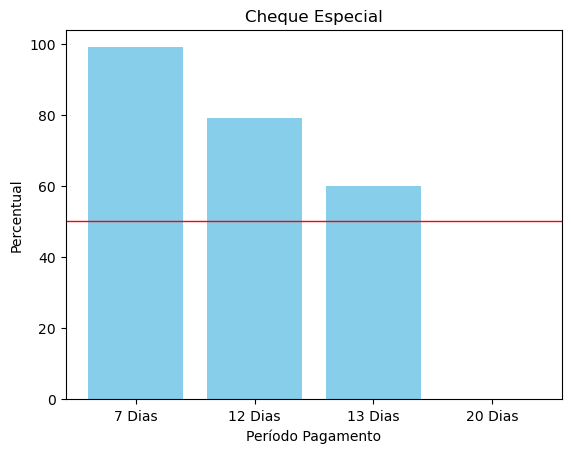

In [133]:
dias = ['7 Dias','12 Dias','13 Dias','20 Dias']
z_scores = [99,79,60,0.01]
fig, ax = plt.subplots()
ax.bar(dias, z_scores, color='skyblue')
ax.axhline(y=50, color = 'red', linewidth = 1)
ax.set_title('Cheque Especial')
ax.set_xlabel('Período Pagamento')
ax.set_ylabel('Percentual')